# Problem statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a “dock” which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people’s needs once the situation gets better all around and stand out from other service providers and make huge profits.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes?
How well do those variables describe the bike demands?
Based on various meteorological surveys and people’s styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors.

## Data Preparation

1. You can observe in the dataset that some of the variables like ‘weathersit’ and ‘season’ have values as 1, 2, 3, 4 which have specific labels associated with them (as can be seen in the data dictionary). These numeric values associated with the labels may indicate that there is some order to them — which is actually not the case (Check the data dictionary and think why). So, it is advisable to convert such feature values into categorical string values before proceeding with model building. Please refer the data dictionary to get a better understanding of all the independent variables.
2. You might notice the column ‘yr’ with two values 0 and 1 indicating the years 2018 and 2019 respectively. At the first instinct, you might think it is a good idea to drop this column as it only has two values so it might not be a value-add to the model. But in reality, since these bike-sharing systems are slowly gaining popularity, the demand for these bikes is increasing every year proving that the column ‘yr’ might be a good variable for prediction. So think twice before dropping it.

## Model building

In the dataset provided, you will notice that there are three columns named ‘casual’, ‘registered’, and ‘cnt’. The variable ‘casual’ indicates the number casual users who have made a rental. The variable ‘registered’ on the other hand shows the total number of registered users who have made a booking on a given day. Finally, the ‘cnt’ variable indicates the total number of bike rentals, including both casual and registered. The model should be built taking this ‘cnt’ as the target variable.

## 1] Reading and understanding Data

### Import librabries require

In [171]:
import calendar
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Regression libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Suppress warnings
import warnings
warnings.filterwarnings(action = 'ignore')

#### Get data set 

In [174]:
#uploading dataset
df = pd.read_csv("BikeSharing.csv")

In [176]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [178]:
df.shape

(730, 16)

In [180]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


## 2] Data Evaluation

#### check for null values present in Dataframe

In [186]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

There are no null values preset so we can direct process with further analysis

#### Lets check first continuos and categorial values    

#### Check for any duplicate present 

In [191]:
# Dropping duplicates
df.drop_duplicates(inplace = True)

In [193]:
# Verifying the shape of the dataframe
df.shape

(730, 16)

##### As no column has been drop, there is no duplicate present in given dataset

## 3] Data cleaning and Manupulation of Data

In [197]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

Lets drop column not require for analysis

In [200]:
df.drop(['casual', 'dteday', 'instant', 'registered'], axis = 1, inplace = True)

In [202]:
df.shape

(730, 12)

## 4] Data conversion

1. Conversion of below values into there categoria variable values.
    Season : Spring, Summer, Fall, Winter 
    

In [206]:
# Replace the numbers to different class values of season as per data dictionary
df['season'].replace({ 1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter' }, inplace = True)

2. Converting mnth values (1, 2, ... , 11, 12) into a categorical variable like January, February, ... , November, December

In [209]:
# Replace the numbers to different class values of the month
import calendar
df['mnth'] = df['mnth'].apply(lambda x: calendar.month_name[x])

3. Days with respective day values

In [212]:
df['weekday'] = df['weekday'].apply(lambda x: calendar.day_name[x])

df['weekday'].value_counts(ascending = False)

In [215]:
df['weathersit'].replace({ 1: 'Good', 2: 'Moderate', 3: 'Bad', 4: 'Severe' }, inplace = True)

In [217]:
df['weathersit'].value_counts

<bound method IndexOpsMixin.value_counts of 0      Moderate
1      Moderate
2          Good
3          Good
4          Good
         ...   
725    Moderate
726    Moderate
727    Moderate
728        Good
729    Moderate
Name: weathersit, Length: 730, dtype: object>

In [219]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,January,0,Sunday,0,Moderate,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,January,0,Monday,0,Moderate,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,January,0,Tuesday,1,Good,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,January,0,Wednesday,1,Good,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,January,0,Thursday,1,Good,9.305237,11.46350,43.6957,12.522300,1600


## 5] EDA

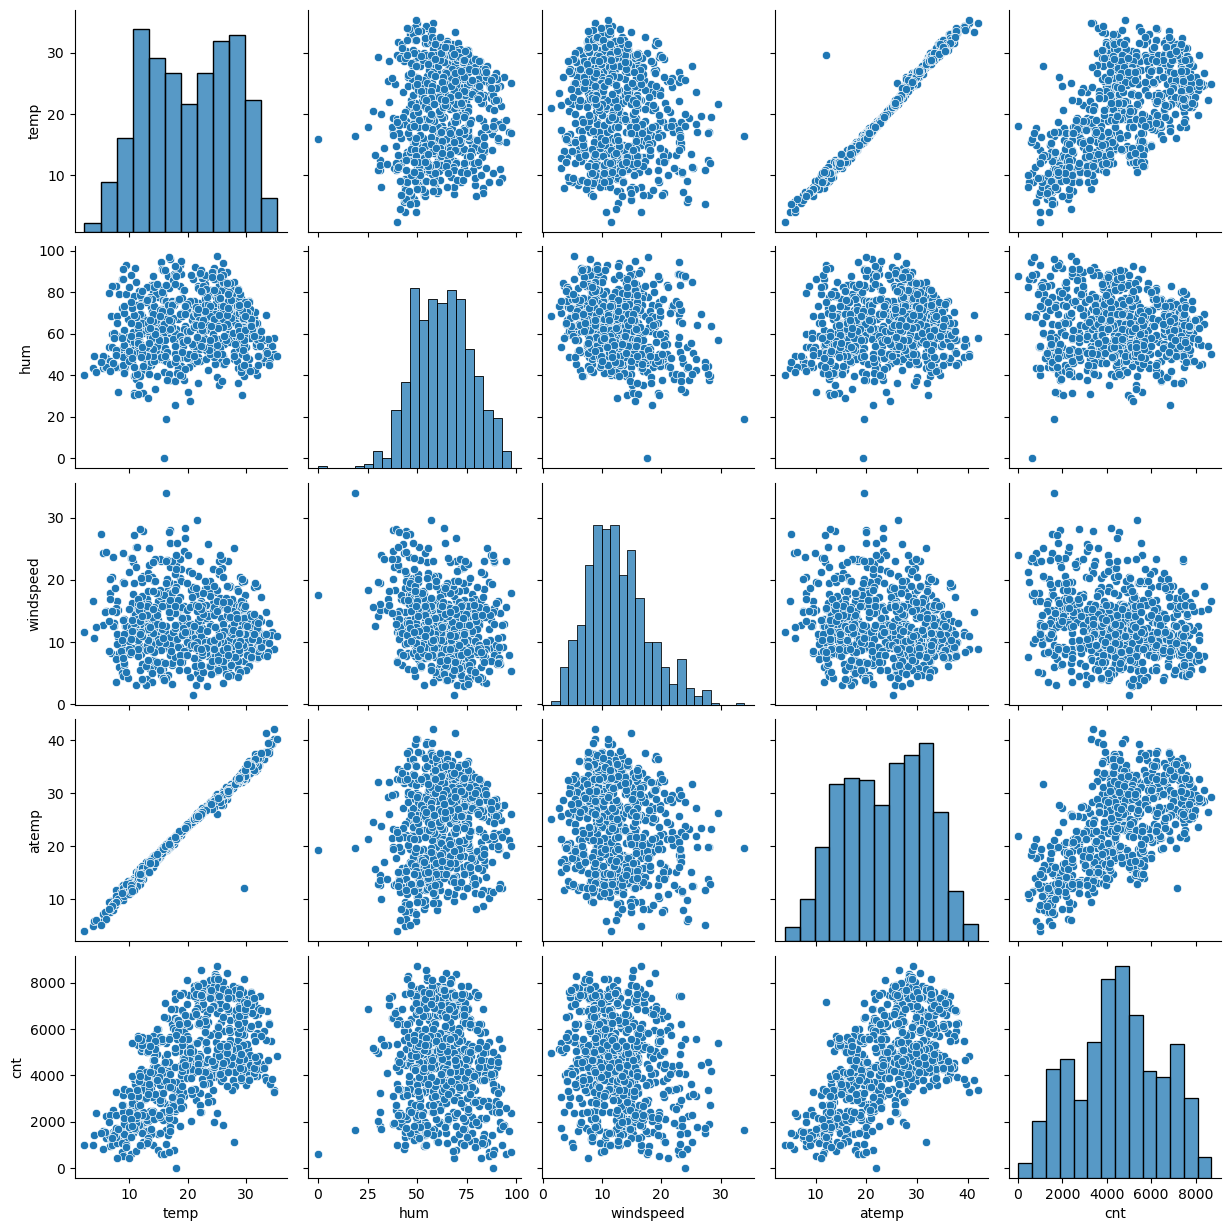

In [222]:
#Pairplot for numeric variables
sns.pairplot(df, vars=["temp", "hum",'windspeed','atemp','cnt'])
plt.show()

From above plots below are observations:
- Most bikes were rented when temp is 20 C
- Higher the humidity higher bike hirings
- When windspeed is approx 12 - 15 , bike highring rate is more.

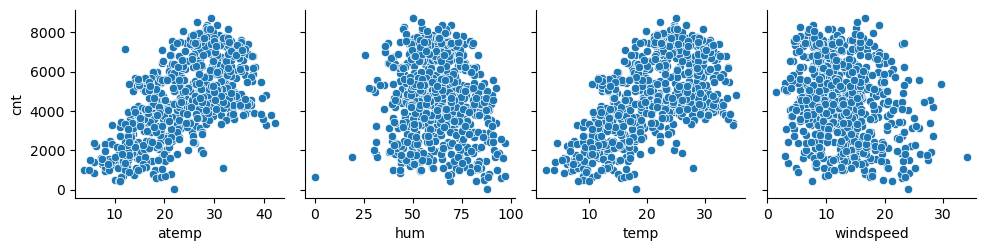

In [225]:
# Draw pairplot for continuous independent numeric variables against a dependent variable `cnt`
cols = ['atemp','hum','temp','windspeed']
sns.pairplot(data = df, x_vars = cols, y_vars = ['cnt'])
plt.show()

In [227]:
#Check correlation between continuos variable and numerical variable
df[cols + ['cnt']].corr(numeric_only = True)

,atemp,hum,temp,windspeed,cnt
atemp,1.000000,0.141512,0.991696,-0.183876,0.630685
hum,0.141512,1.000000,0.128565,-0.248506,-0.098543
temp,0.991696,0.128565,1.000000,-0.158186,0.627044
windspeed,-0.183876,-0.248506,-0.158186,1.000000,-0.235132
cnt,0.630685,-0.098543,0.627044,-0.235132,1.000000


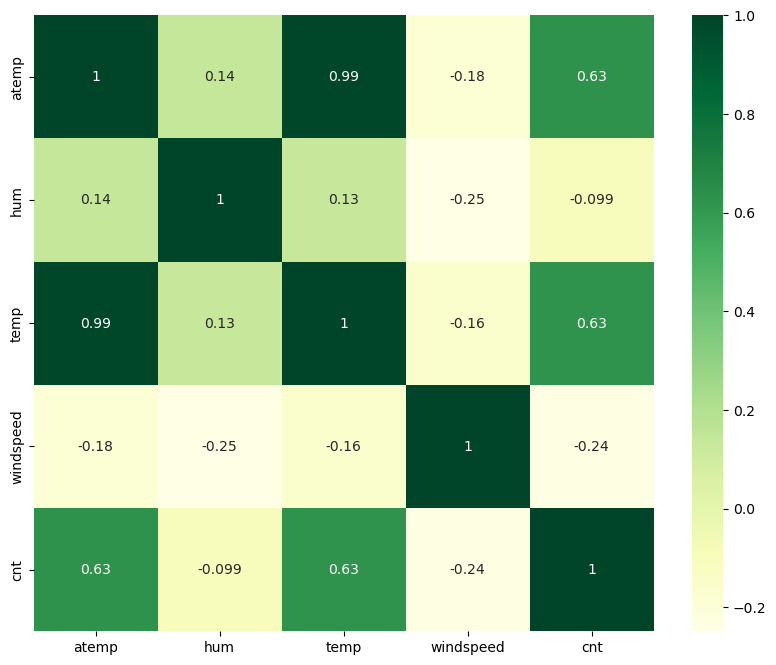

In [229]:
plt.figure(figsize = (10, 8))
corr_df = df[cols + ['cnt']].corr(numeric_only = True)
sns.heatmap(data = corr_df, annot = True, cmap = 'YlGn')
plt.show()

From heatmap above it is clearing seen that:
- String correlation between cnt ,temp and atemp.
- temp and atemp shows strong correlation
- windspeed and hum are having negative correlation with cnt


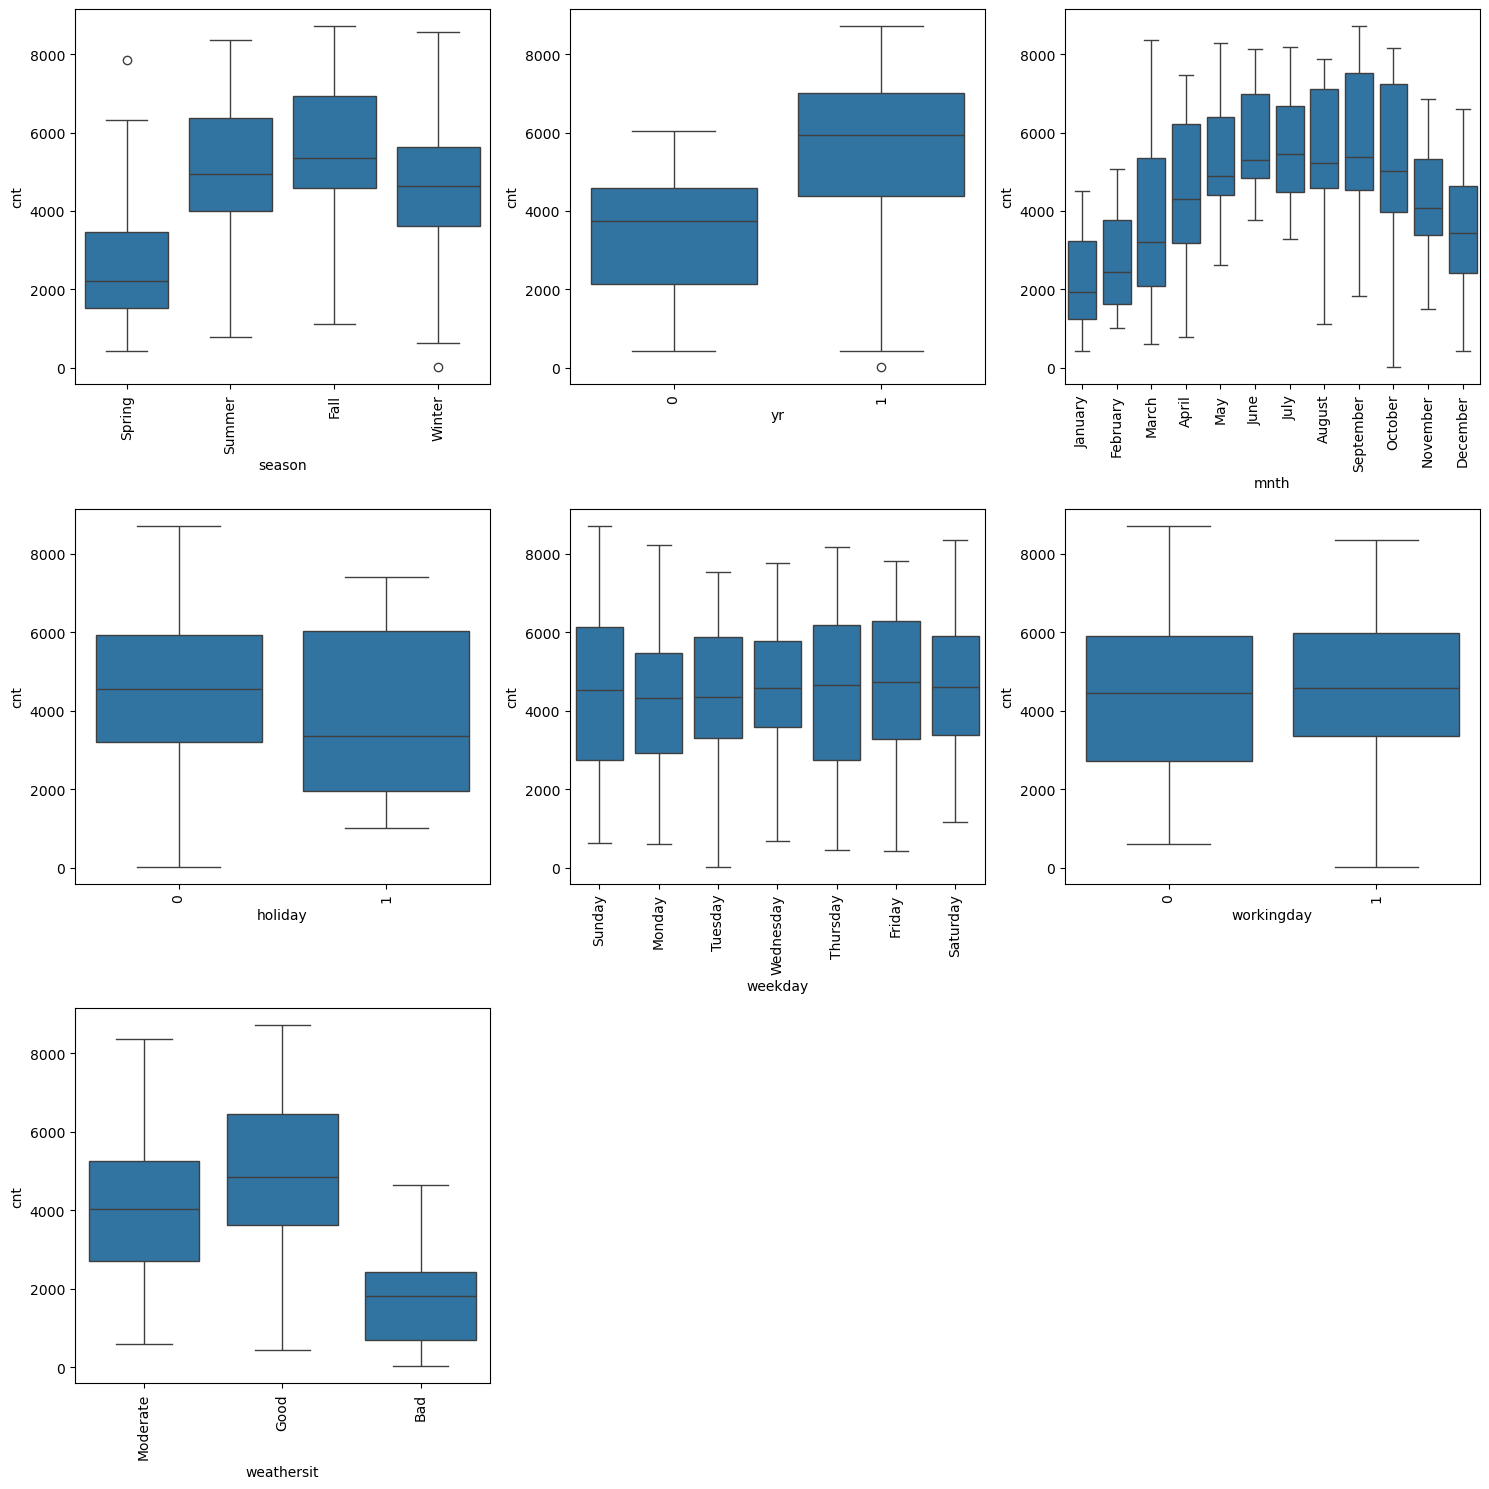

In [232]:
# Draw boxplot for categorical variables against a dependent variable `cnt`
cat_cols = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
plt.figure(figsize = (15, 15))
i =0
for cat in cat_cols:
    i=i+1
    plt.subplot(3, 3, i)
    sns.boxplot(data = df, x = cat, y = 'cnt')
    plt.xticks(rotation = 90)
plt.tight_layout()    
plt.show()

Observation from above box plot is :
- Peak bike rentals occurred during July-September.
- 2019 had more bike rentals than 2018.
- The highest bike rentals were observed during good weather conditions

#### Lets check correlatin between cat variable and target variable

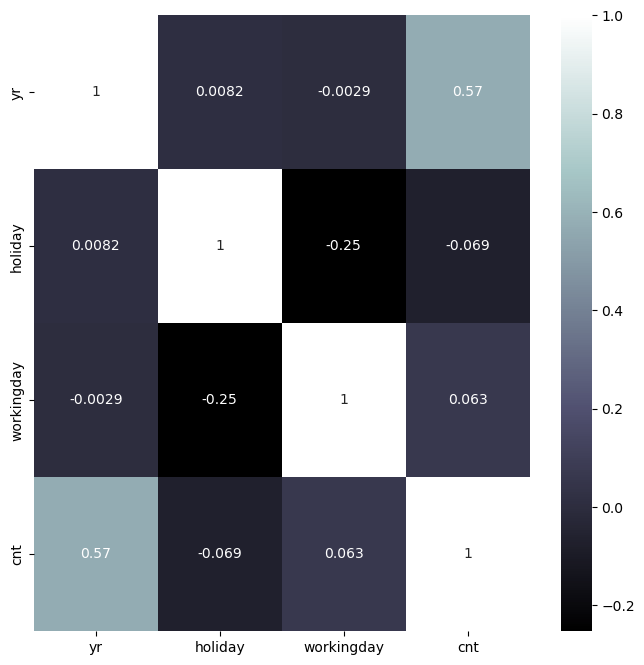

In [236]:
# Verifying the correlation
plt.figure(figsize = (8, 8))
corr_df = df[cat_cols+['cnt']].corr(numeric_only = True)
sns.heatmap(data = corr_df, annot = True, cmap = 'bone')
plt.show()

yr is having the best positive correlation among all categorical variables.

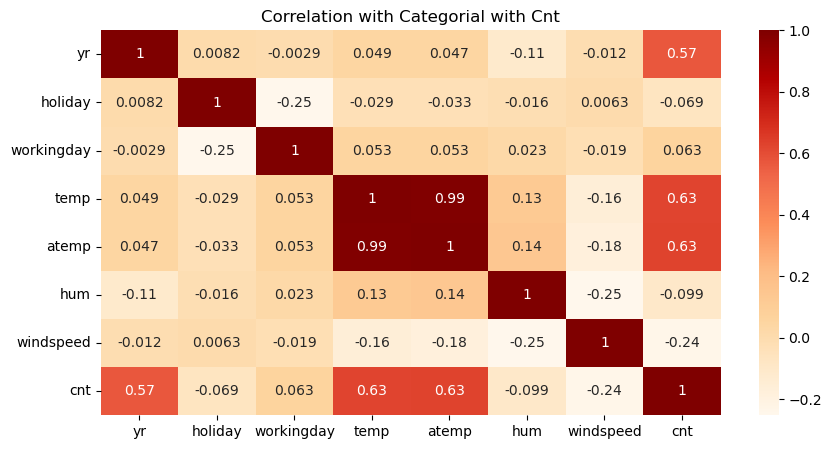

In [239]:
plt.figure(figsize = (10, 5))
sns.heatmap(df.corr(numeric_only = True), annot = True, cmap = 'OrRd')

plt.title("Correlation with Categorial with Cnt")
plt.show()

## 6] Data Preparation

In [242]:
df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [244]:
cat_cols = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
df[cat_cols].nunique()

season         4
yr             2
mnth          12
holiday        2
weekday        7
workingday     2
weathersit     3
dtype: int64

#### Columns having more that two unique values are eligible for dummy variable

Let create dummy variale for season, mnth, weekday, and weathersit

In [248]:
df = pd.get_dummies(data = df, columns = ['season', 'mnth', 'weekday', 'weathersit'], drop_first = True, prefix = '', prefix_sep = '')


Dropping the first column in each category (season, mnth, weekday, weathersit) reduces the number of dummy variables to (n - 1) for explaining n categories.

Dropping the first column in each category (season, mnth, weekday, weathersit) reduces the number of dummy variables to (n - 1) for explaining n categories.

In [252]:
# Inspecting the new bike dataframe
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Good,Moderate
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,True,False,...,False,False,False,False,True,False,False,False,False,True
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,True,False,...,False,False,True,False,False,False,False,False,False,True
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,True,False,...,False,False,False,False,False,False,True,False,True,False
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,True,False,...,False,False,False,False,False,False,False,True,True,False
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,True,False,...,False,False,False,False,False,True,False,False,True,False


In [254]:
df.columns


Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'Spring', 'Summer', 'Winter', 'August', 'December', 'February',
       'January', 'July', 'June', 'March', 'May', 'November', 'October',
       'September', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday', 'Good', 'Moderate'],
      dtype='object')

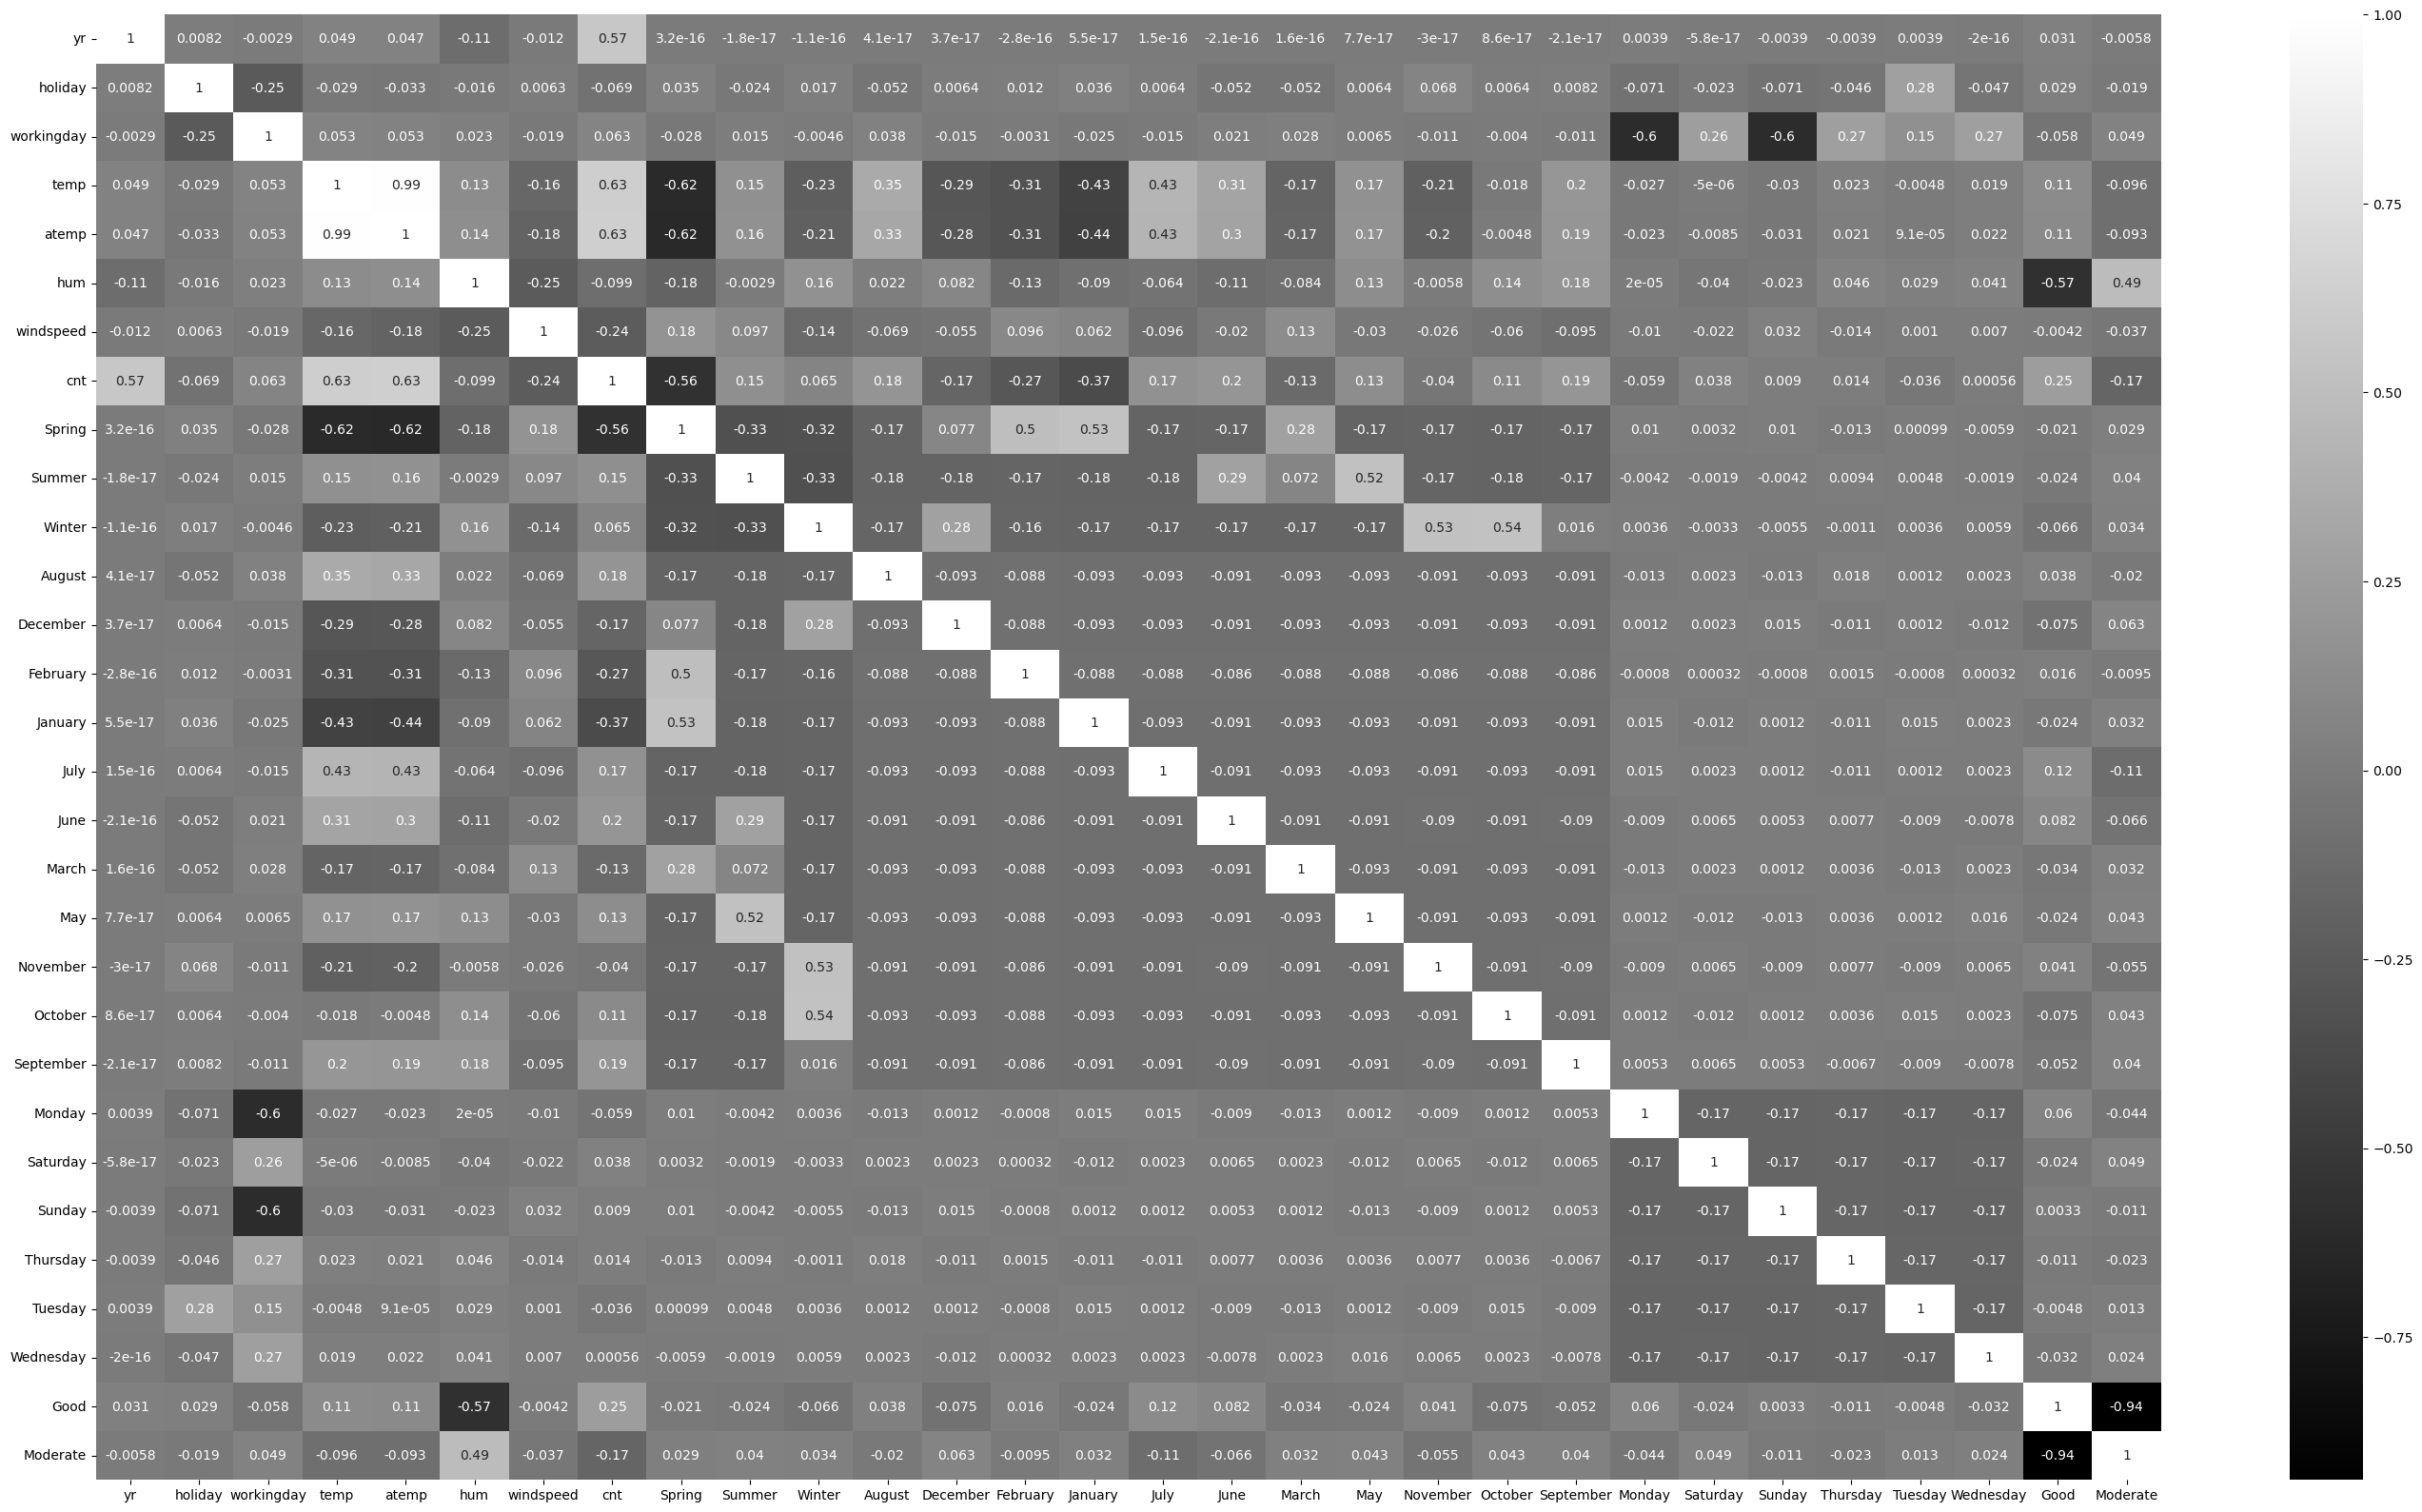

In [256]:
# Checking how are all these related to the dependent variable via correlation
plt.figure(figsize = (35, 20))
corr_df = df[list(df.columns)].corr(numeric_only = True)
sns.heatmap(data = corr_df, annot = True, cmap = 'gist_gray')
plt.show()

In [258]:
df.shape

(730, 30)

## 7] Model building and manual elimination

In [261]:
# Getting the feature variables in X and dependent variable `cnt` in y
X = df.drop('cnt', axis = 1)
y = df['cnt']

### Splitting the dataset into training and test set

In [264]:
# Splitting the data into a 70% training set and a 30% test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

In [266]:
#  Checking shape and size for train and test set
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(511, 29)
(511,)
(219, 29)
(219,)


In [268]:
# Inspect the head of the training set
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,Spring,Summer,Winter,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Good,Moderate
653,1,0,1,19.201653,23.0423,55.8333,12.208807,False,False,True,...,True,False,False,False,False,False,False,True,True,False
576,1,0,1,29.246653,33.1448,70.4167,11.083475,False,False,False,...,False,False,False,False,False,False,False,True,True,False
426,1,0,0,16.980847,20.6746,62.1250,10.792293,True,False,False,...,False,False,False,False,True,False,False,False,False,True
728,1,0,0,10.489153,11.5850,48.3333,23.500518,True,False,False,...,False,False,True,False,False,False,False,False,True,False
482,1,0,0,15.443347,18.8752,48.9583,8.708325,False,True,False,...,False,False,False,False,True,False,False,False,False,True


In [270]:
# Use StandardScaler to scale values
scaler = StandardScaler()

# Fit and transform training set
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns, index = X_train.index)

# Only Transform Test set
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns, index = X_test.index)

In [272]:
# Inspect the training set after scaling
X_train_scaled.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,Spring,Summer,Winter,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Good,Moderate
653,0.98254,-0.161569,0.690564,-0.121991,-0.056605,-0.514975,-0.118309,-0.566051,-0.572078,1.738857,...,3.257858,-0.295354,-0.408248,-0.381759,-0.427633,-0.434019,-0.421212,2.552392,0.772577,-0.724826
576,0.98254,-0.161569,0.690564,1.232298,1.194457,0.517177,-0.331370,-0.566051,-0.572078,-0.575091,...,-0.306950,-0.295354,-0.408248,-0.381759,-0.427633,-0.434019,-0.421212,2.552392,0.772577,-0.724826
426,0.98254,-0.161569,-1.448092,-0.421405,-0.349813,-0.069675,-0.386500,1.766626,-0.572078,-0.575091,...,-0.306950,-0.295354,-0.408248,-0.381759,2.338451,-0.434019,-0.421212,-0.391789,-1.294370,1.379641
728,0.98254,-0.161569,-1.448092,-1.296629,-1.475441,-1.045794,2.019569,1.766626,-0.572078,-0.575091,...,-0.306950,-0.295354,2.449490,-0.381759,-0.427633,-0.434019,-0.421212,-0.391789,0.772577,-0.724826
482,0.98254,-0.161569,-1.448092,-0.628694,-0.572645,-1.001559,-0.781062,-0.566051,1.748015,-0.575091,...,-0.306950,-0.295354,-0.408248,-0.381759,2.338451,-0.434019,-0.421212,-0.391789,-1.294370,1.379641


## 8] RFE (Recursive Feature Elimination) for feature selection 

In [275]:
# Create and train the model with RFE
lm = LinearRegression()

rfe = RFE(lm, n_features_to_select = 15)

rfe = rfe.fit(X_train_scaled, y_train)

In [277]:
rfe.support_

array([ True,  True, False,  True, False,  True,  True,  True,  True,
        True, False, False, False,  True,  True, False, False, False,
        True, False,  True,  True, False, False, False, False, False,
        True,  True])

In [279]:

# List of feature variables and their respective selection status and ranks
list(zip(X_train_scaled.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 5),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Spring', True, 1),
 ('Summer', True, 1),
 ('Winter', True, 1),
 ('August', False, 9),
 ('December', False, 2),
 ('February', False, 3),
 ('January', True, 1),
 ('July', True, 1),
 ('June', False, 11),
 ('March', False, 12),
 ('May', False, 7),
 ('November', True, 1),
 ('October', False, 13),
 ('September', True, 1),
 ('Monday', True, 1),
 ('Saturday', False, 15),
 ('Sunday', False, 4),
 ('Thursday', False, 14),
 ('Tuesday', False, 8),
 ('Wednesday', False, 10),
 ('Good', True, 1),
 ('Moderate', True, 1)]

In [281]:
# Get the columns which are selected using RFE approach
rfe_selected = X_train_scaled.columns[rfe.support_]
rfe_selected

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'Spring', 'Summer',
       'Winter', 'January', 'July', 'November', 'September', 'Monday', 'Good',
       'Moderate'],
      dtype='object')

In [283]:
# Get the columns which are rejected using RFE approach
ref_rejected = X_train_scaled.columns[~rfe.support_]
ref_rejected

Index(['workingday', 'atemp', 'August', 'December', 'February', 'June',
       'March', 'May', 'October', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday'],
      dtype='object')

#### Manual feature elimination technique

Manual feature elimination requires identifying features with p-values exceeding 0.05, rendering their coefficients statistically insignificant, and having VIF values surpassing 5.

### Model first

In [288]:
ref1 = X_train_scaled[rfe_selected]

In [290]:
X_train_sm = sm.add_constant(ref1)
lm = sm.OLS(y_train, X_train_sm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     185.1
Date:                Tue, 29 Oct 2024   Prob (F-statistic):          7.37e-192
Time:                        22:19:42   Log-Likelihood:                -4114.1
No. Observations:                 511   AIC:                             8260.
Df Residuals:                     495   BIC:                             8328.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4491.3033     34.117    131.646      0.0

#### Calculate Variance Inflation Factor (VIF) for features in the training set.

    VIF measures the extent to which the variance of an independent variable is inflated by the existence of other 
    independent variables in the model. High VIF values indicate strong correlation between variables

In [293]:
vif = pd.DataFrame()
vif["Features"] = ref1.columns
vif["VIF"] = [variance_inflation_factor(ref1.values, i) for i in range(len(ref1.columns))]
    
vif['VIF'] = round(vif['VIF'], 2)
vif

,Features,VIF
0,yr,1.04
1,holiday,1.04
2,temp,3.97
3,hum,1.91
4,windspeed,1.21
5,Spring,5.20
6,Summer,2.68
7,Winter,3.77
8,January,1.57
9,July,1.49


### Model 2

- Excluding holiday due to its elevated p-value of 0.127 and a high VIF approaching inf, indicating potential multicollinearity.

In [297]:
ref2 = ref1.drop(['November'], axis = 1)

In [299]:
X_train_sm = sm.add_constant(ref2)
lm = sm.OLS(y_train, X_train_sm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     197.7
Date:                Tue, 29 Oct 2024   Prob (F-statistic):          1.55e-192
Time:                        22:19:46   Log-Likelihood:                -4115.2
No. Observations:                 511   AIC:                             8260.
Df Residuals:                     496   BIC:                             8324.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4491.3033     34.158    131.485      0.0

In [301]:
vif = pd.DataFrame()
vif["Features"] = ref2.columns
vif["VIF"] = [variance_inflation_factor(ref2.values, i) for i in range(len(ref2.columns))]
    
vif['VIF'] = round(vif['VIF'], 2)
vif

,Features,VIF
0,yr,1.04
1,holiday,1.02
2,temp,3.89
3,hum,1.91
4,windspeed,1.21
5,Spring,5.09
6,Summer,2.65
7,Winter,3.60
8,January,1.57
9,July,1.49


### Model 3

- Eliminating Good because it has very high VIF of 10.28

In [305]:
ref3 = ref2.drop(['Good'], axis = 1)

In [307]:
X_train_sm = sm.add_constant(ref3)
lm = sm.OLS(y_train, X_train_sm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     174.6
Date:                Tue, 29 Oct 2024   Prob (F-statistic):          9.67e-176
Time:                        22:19:49   Log-Likelihood:                -4157.9
No. Observations:                 511   AIC:                             8344.
Df Residuals:                     497   BIC:                             8403.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4491.3033     37.100    121.059      0.0

In [309]:
vif = pd.DataFrame()
vif["Features"] = ref3.columns
vif["VIF"] = [variance_inflation_factor(ref3.values, i) for i in range(len(ref3.columns))]
    
vif['VIF'] = round(vif['VIF'], 2)
vif

,Features,VIF
0,yr,1.04
1,holiday,1.02
2,temp,3.81
3,hum,1.61
4,windspeed,1.16
5,Spring,5.07
6,Summer,2.64
7,Winter,3.59
8,January,1.56
9,July,1.49


### Model 4
- Remove season (Spring) because it has a high p-value of 0.063

In [312]:
ref4 = ref3.drop(['Spring'], axis = 1)

In [314]:
X_train_sm = sm.add_constant(ref4)
lm = sm.OLS(y_train, X_train_sm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     188.2
Date:                Tue, 29 Oct 2024   Prob (F-statistic):          2.83e-176
Time:                        22:19:50   Log-Likelihood:                -4159.4
No. Observations:                 511   AIC:                             8345.
Df Residuals:                     498   BIC:                             8400.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4491.3033     37.169    120.836      0.0

In [316]:
vif = pd.DataFrame()
vif["Features"] = ref4.columns
vif["VIF"] = [variance_inflation_factor(ref4.values, i) for i in range(len(ref4.columns))]
    
vif['VIF'] = round(vif['VIF'], 2)
vif

,Features,VIF
0,yr,1.03
1,holiday,1.02
2,temp,2.03
3,hum,1.60
4,windspeed,1.15
5,Summer,1.41
6,Winter,1.53
7,January,1.54
8,July,1.43
9,September,1.19


### Model 5
- Removing January which is having high P- value

In [319]:
ref5 = ref4.drop(['January'], axis = 1)

In [321]:
X_train_sm = sm.add_constant(ref5)
lm = sm.OLS(y_train, X_train_sm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     204.5
Date:                Tue, 29 Oct 2024   Prob (F-statistic):          6.95e-177
Time:                        22:19:52   Log-Likelihood:                -4160.7
No. Observations:                 511   AIC:                             8345.
Df Residuals:                     499   BIC:                             8396.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4491.3033     37.227    120.645      0.0

In [323]:
vif = pd.DataFrame()
vif["Features"] = ref5.columns
vif["VIF"] = [variance_inflation_factor(ref5.values, i) for i in range(len(ref5.columns))]
    
vif['VIF'] = round(vif['VIF'], 2)
vif

,Features,VIF
0,yr,1.03
1,holiday,1.02
2,temp,1.58
3,hum,1.59
4,windspeed,1.13
5,Summer,1.33
6,Winter,1.29
7,July,1.43
8,September,1.19
9,Monday,1.01


### Model 6
- Removing Moderate for higher p-value of 0.031

In [326]:
ref6 = ref5.drop(['Moderate'], axis = 1)

In [328]:
X_train_sm = sm.add_constant(ref6)
lm = sm.OLS(y_train, X_train_sm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     222.8
Date:                Tue, 29 Oct 2024   Prob (F-statistic):          4.66e-177
Time:                        22:19:54   Log-Likelihood:                -4163.1
No. Observations:                 511   AIC:                             8348.
Df Residuals:                     500   BIC:                             8395.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4491.3033     37.365    120.201      0.0

In [330]:
vif = pd.DataFrame()
vif["Features"] = ref6.columns
vif["VIF"] = [variance_inflation_factor(ref6.values, i) for i in range(len(ref6.columns))]
    
vif['VIF'] = round(vif['VIF'], 2)
vif

,Features,VIF
0,yr,1.03
1,holiday,1.02
2,temp,1.53
3,hum,1.17
4,windspeed,1.13
5,Summer,1.33
6,Winter,1.27
7,July,1.43
8,September,1.19
9,Monday,1.01


The model is deemed satisfactory with a remarkably low Prob (F-statistic) 4.66e-177, features displaying low p-values and VIF, and 
 and Adjusted 
 values of 0.817 and 0.813, slightly lower than model 5. This will serve as the final evaluation model.

### 8] Model Evaluation

#### Residual Analysis

In [335]:
# Final built in model for use
model = lm
X_train_sm 

,const,yr,holiday,temp,hum,windspeed,Summer,Winter,July,September,Monday
653,1.0,0.98254,-0.161569,-0.121991,-0.514975,-0.118309,-0.572078,1.738857,-0.287449,-0.295354,-0.408248
576,1.0,0.98254,-0.161569,1.232298,0.517177,-0.331370,-0.572078,-0.575091,3.478874,-0.295354,-0.408248
426,1.0,0.98254,-0.161569,-0.421405,-0.069675,-0.386500,-0.572078,-0.575091,-0.287449,-0.295354,-0.408248
728,1.0,0.98254,-0.161569,-1.296629,-1.045794,2.019569,-0.572078,-0.575091,-0.287449,-0.295354,2.449490
482,1.0,0.98254,-0.161569,-0.628694,-1.001559,-0.781062,1.748015,-0.575091,-0.287449,-0.295354,-0.408248
...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,0.98254,-0.161569,1.448801,0.201630,-0.788939,-0.572078,-0.575091,-0.287449,-0.295354,-0.408248
53,1.0,-1.01777,-0.161569,-1.485091,-1.472501,-1.235979,-0.572078,-0.575091,-0.287449,-0.295354,-0.408248
350,1.0,-1.01777,-0.161569,-1.282810,-0.497281,0.654804,-0.572078,1.738857,-0.287449,-0.295354,-0.408248
79,1.0,-1.01777,-0.161569,-0.331480,0.752323,1.233453,1.748015,-0.575091,-0.287449,-0.295354,-0.408248


In [337]:
# Calculate y_train_pred
y_train_pred = model.predict(X_train_sm)

<Figure size 800x500 with 0 Axes>

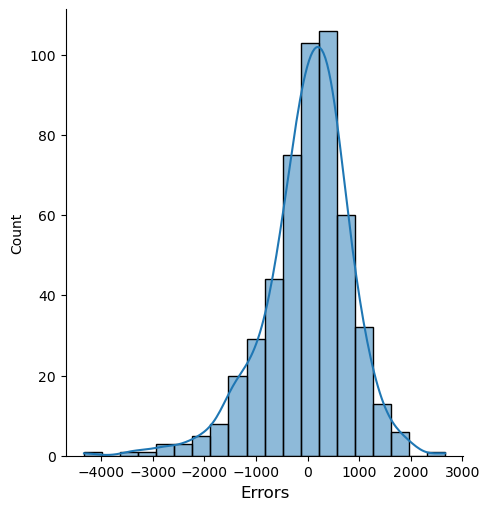

In [339]:
# Plot the histogram of the error terms on the training set
residuals = y_train - y_train_pred
fig = plt.figure(figsize = (8, 5))
sns.displot(residuals, bins = 20, kde = True)
plt.xlabel('Errors', fontsize = 12)
plt.show()

#### Fitting line with final model lm

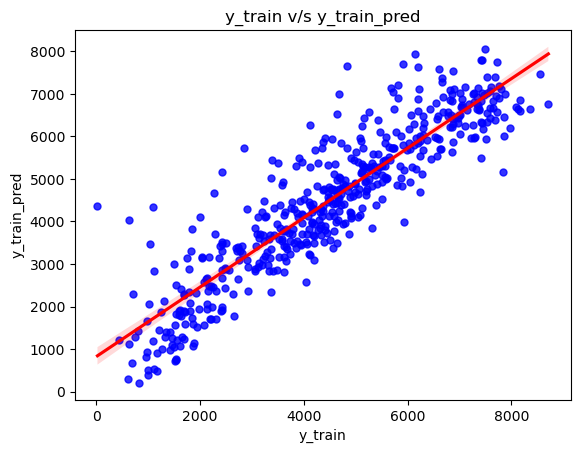

In [342]:
# Visualize the trained model using a scatter plot with a linear regression fit line
sns.regplot(x = y_train, y = y_train_pred, line_kws = { 'color': 'red' }, scatter_kws = { 's' : 25, 'color': 'blue' })

# Show the plot
plt.title('y_train v/s y_train_pred')
plt.xlabel('y_train')
plt.ylabel('y_train_pred') 
plt.show()

In [344]:
# Calculate mean squared error of the training set
mse_train = mean_squared_error(y_train, y_train_pred)

In [346]:
# Calculate RMSE
rmse_train = np.sqrt(mse_train)
rmse_train

835.5054202378703

### Testing on test data set

In [349]:
# Retain only the selected feature from the final model and test only on remaining columsn
# hence removing additional columns
X_test_scaled = X_test_scaled[ref6.columns]
X_test_scaled.head()

,yr,holiday,temp,hum,windspeed,Summer,Winter,July,September,Monday
184,-1.01777,6.189321,1.306004,0.048287,-1.396242,-0.572078,-0.575091,3.478874,-0.295354,-0.408248
535,0.98254,-0.161569,1.614633,-0.276107,-0.986093,1.748015,-0.575091,-0.287449,-0.295354,-0.408248
299,-1.01777,-0.161569,-0.112776,1.286864,0.078844,-0.572078,1.738857,-0.287449,-0.295354,-0.408248
221,-1.01777,-0.161569,1.527113,-1.464546,0.110494,-0.572078,-0.575091,-0.287449,-0.295354,-0.408248
152,-1.01777,-0.161569,1.241512,-2.307960,1.277902,1.748015,-0.575091,-0.287449,-0.295354,-0.408248


In [351]:
# Add constant to the test set
X_test_sm = sm.add_constant(X_test_scaled)

In [353]:
y_test_pred = model.predict(X_test_sm)

### $R^2$ and adj $R^2$ for test result set

In [356]:
# Calculate R2 Score for the test set
r2_score_test = r2_score(y_true = y_test, y_pred = y_test_pred)
r2_score_test = round(r2_score_test, 2)
r2_score_test

0.8

In [358]:

# Calculate Adjusted R2 Score for the test set

n_features = len(X_test_scaled.columns)
r2 = r2_score(y_test, y_test_pred)
n = len(y_test)
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - n_features - 1))
round(adjusted_r2,2)

0.79

In [360]:
# Calculate mean squared error of the test set
mse_test = mean_squared_error(y_test, y_test_pred)

# Calculate RMSE
rmse_test = np.sqrt(mse_test)

print(rmse_test)

837.791488972834


In [362]:
# Coefficients of the final model
round(model.params, 2)

const        4491.30
yr            992.43
holiday      -126.54
temp         1229.32
hum          -442.38
windspeed    -350.59
Summer        303.88
Winter        510.12
July         -123.63
September     211.14
Monday       -109.19
dtype: float64

In [364]:
# Get R2 Score for Training set
r2_score_train = round(model.rsquared, 2)
adj_r2_score_train = round(model.rsquared_adj, 2)
r2_score_train

0.82

#### R2 Score for Training set [0.82]

In [367]:
adj_r2_score_train

0.81

#### Adj R2 Score for Training set [0.81]

In [370]:
r2_score_test

0.8

#### Adj R2 Score for Training set [0.8]

In [373]:
round(adjusted_r2,2)

0.79

#### Adj R2 Score for Training set [0.79]

### For our model, the best fit line is determined by the following equation:

cnt = 4491.30 + 992.43 x yr + 1229.32 x temp -442.38 x hum - 350.59 x windspeed + 303.88 x Summer + 510.12 x Winter -123.63 x July + 211.14 x September -109.19 x Monday

### Conclusion

#### Final equation formed :

- cnt = 4491.30 + 992.43 x yr + 1229.32 x temp -442.38 x hum - 350.59 x windspeed + 303.88 x Summer + 510.12 x Winter -123.63 x July + 211.14 x September -109.19 x Monday
- Three key feature variables, temp, yr, and Winter, exhibit the highest coefficient values, indicating their significant impact.
- The RMSE values of 837 in the training set and 839 in the test set for a linear regression model indicate that the model is fitting well to the training data and generalizing reasonably to new, unseen data with a small difference between training and test set performance.
